In [75]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
from datetime import date

In [76]:
#Retrieves data from Yahoo for prices of cryptocurrencies in real time
now=dt.datetime.now()
def get_crypto_prices(ticker):
    data=pd.DataFrame()
    names=list()
    for i in ticker:
        data=pd.concat([data,pdr.get_data_yahoo(symbols=i, start=dt.datetime(2020,1,1), end=now).iloc[:,1]],axis=1)
        names.append(i)
    data.columns=names
    return data
                       
ticks=['BTC-USD','ETH-USD','BNB-USD','SOL-USD','LUNA1-USD','AVAX-USD','ATOM-USD']
d=get_crypto_prices(ticks)
d.tail()

BTC-USD      ETH-USD     BNB-USD    SOL-USD  \
2022-05-03 00:00:00  37585.621094  2762.118652  380.346222  84.922104   
2022-05-04 00:00:00  37732.058594  2779.273682  383.428040  85.728065   
2022-05-05 00:00:00  35856.515625  2704.916260  372.552765  81.834869   
2022-05-06 00:00:00  35482.132812  2645.335205  371.973328  80.468613   
2022-05-07 00:00:00  35776.601562  2659.326904  372.732697  79.539940   

                     LUNA1-USD   AVAX-USD   ATOM-USD  
2022-05-03 00:00:00  81.391624  58.305859  17.528715  
2022-05-04 00:00:00  82.267265  59.498161  17.563868  
2022-05-05 00:00:00  79.330872  57.024452  17.410774  
2022-05-06 00:00:00  77.432007  55.412495  17.255348  
2022-05-07 00:00:00  72.431374  55.374031  16.681982

In [77]:
#Creates corrleation dataframe 
d.corr()

BTC-USD   ETH-USD   BNB-USD   SOL-USD  LUNA1-USD  AVAX-USD  \
BTC-USD    1.000000  0.904173  0.893104  0.682042   0.584902  0.583295   
ETH-USD    0.904173  1.000000  0.967487  0.885940   0.750117  0.810151   
BNB-USD    0.893104  0.967487  1.000000  0.815946   0.724972  0.748029   
SOL-USD    0.682042  0.885940  0.815946  1.000000   0.760415  0.872664   
LUNA1-USD  0.584902  0.750117  0.724972  0.760415   1.000000  0.885996   
AVAX-USD   0.583295  0.810151  0.748029  0.872664   0.885996  1.000000   
ATOM-USD   0.856980  0.907796  0.886231  0.854293   0.797924  0.850124   

           ATOM-USD  
BTC-USD    0.856980  
ETH-USD    0.907796  
BNB-USD    0.886231  
SOL-USD    0.854293  
LUNA1-USD  0.797924  
AVAX-USD   0.850124  
ATOM-USD   1.000000

[Text(0.5, 1.0, 'Heat Map of Crypto Correlation')]

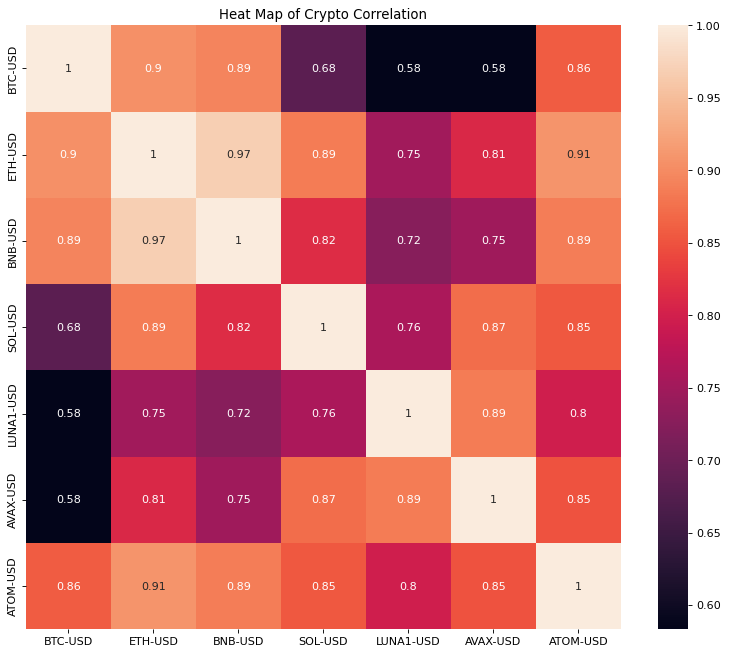

In [78]:
#Plots the correlation dateframe as a heatmap to easily view highly correlated assets
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(12,10),dpi=80)
sn.heatmap(d.corr(),annot=True).set(title='Heat Map of Crypto Correlation')


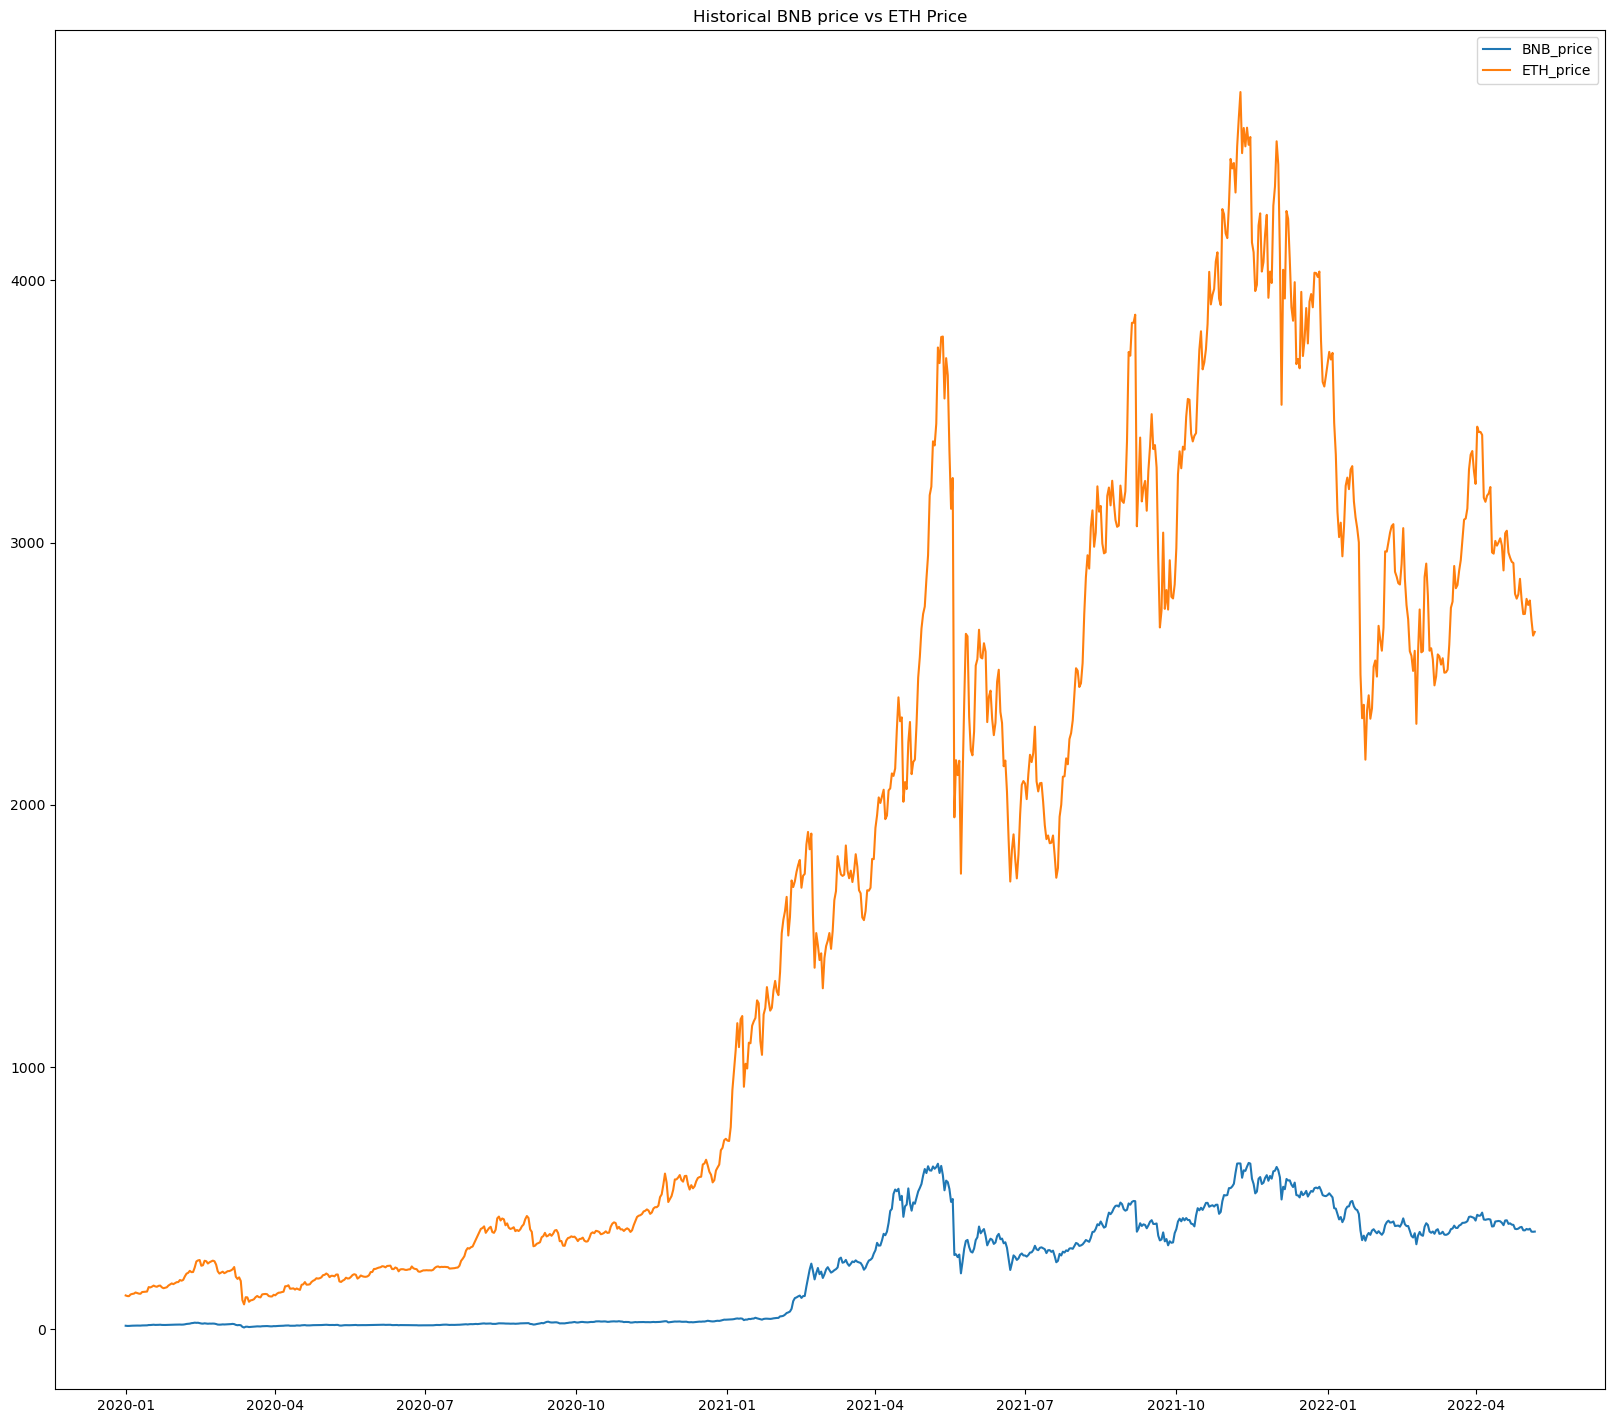

In [79]:
#Plots of the price of ETH and BNB
BNB=d['BNB-USD']
ETH=d['ETH-USD']
figure(figsize=(20,18),dpi=100)
plt.plot(BNB, label='BNB_price')
plt.plot(ETH, label='ETH_price')
plt.title('Historical BNB price vs ETH Price')
plt.legend()

In [80]:
#Retrieves bnb/eth pair price 
bnb_eth=pdr.get_data_yahoo('BNB-ETH',start=dt.datetime(2021,8,14),end=now)

In [81]:
bnb_eth.reset_index(inplace=True)

In [82]:
#gets mean bnb_eth price
mean=bnb_eth.Close.mean()

In [83]:
#Plots BNB/ETH price with rolling averages
figure(figsize=(20, 18), dpi=800)
plt.plot(bnb_eth.Close, label='BNB/ETH ratio')
plt.plot(bnb_eth.Close.rolling(5).mean(), label ='5 day Moving average')
plt.plot(bnb_eth.Close.rolling(20).mean(), label ='20 day Moving average')
plt.plot(bnb_eth.Close.rolling(50).mean(), label ='50 day Moving average')
plt.axhline(mean,color='black')
plt.legend()
plt.title('BNB_ETH Price')

Text(0.5, 1.0, 'BNB_ETH Price')

In [84]:
#Imports stats models to test p value of bnb/eth pair. p-value is under the accpeted threshold of .05 so we can conclude that
#there is correlation between the two assets
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller

results=ts.coint(BNB,ETH)
print('P Value for BNB and Eth is', results[1])
results

P Value for BNB and Eth is 0.011409317781778045


(-3.8556203810626184,
 0.011409317781778045,
 array([-3.909265  , -3.34326893, -3.04940259]))

In [85]:
#Runs the augmented Dickey-Fuller test to determine if the time series data is stationary. In other words to determine if the
#mean price of BNB/ETH stays the same over time. The null hypothesis of the Dickey-Fuller test is equal to 1. So in order to
#accpet the null hypothesis the p-value must be less than .05, and in this case the it is not. Therefore the price of BNB/ETH
#is not stationary and not viable
print('P Value for BNB and ETH is',adfuller(bnb_eth.Close)[1])

P Value for BNB and ETH is 0.08872311687535345


In [86]:
#Creates the upper and lower limits of BNB/ETH using the standard deviation 
lower_limit=bnb_eth.Close.mean()-2*bnb_eth.Close.std()
min_lower=bnb_eth.Close.mean()-bnb_eth.Close.std()
min_upper=bnb_eth.Close.mean()+bnb_eth.Close.std()
upper_limit=bnb_eth.Close.mean()+2*bnb_eth.Close.std()

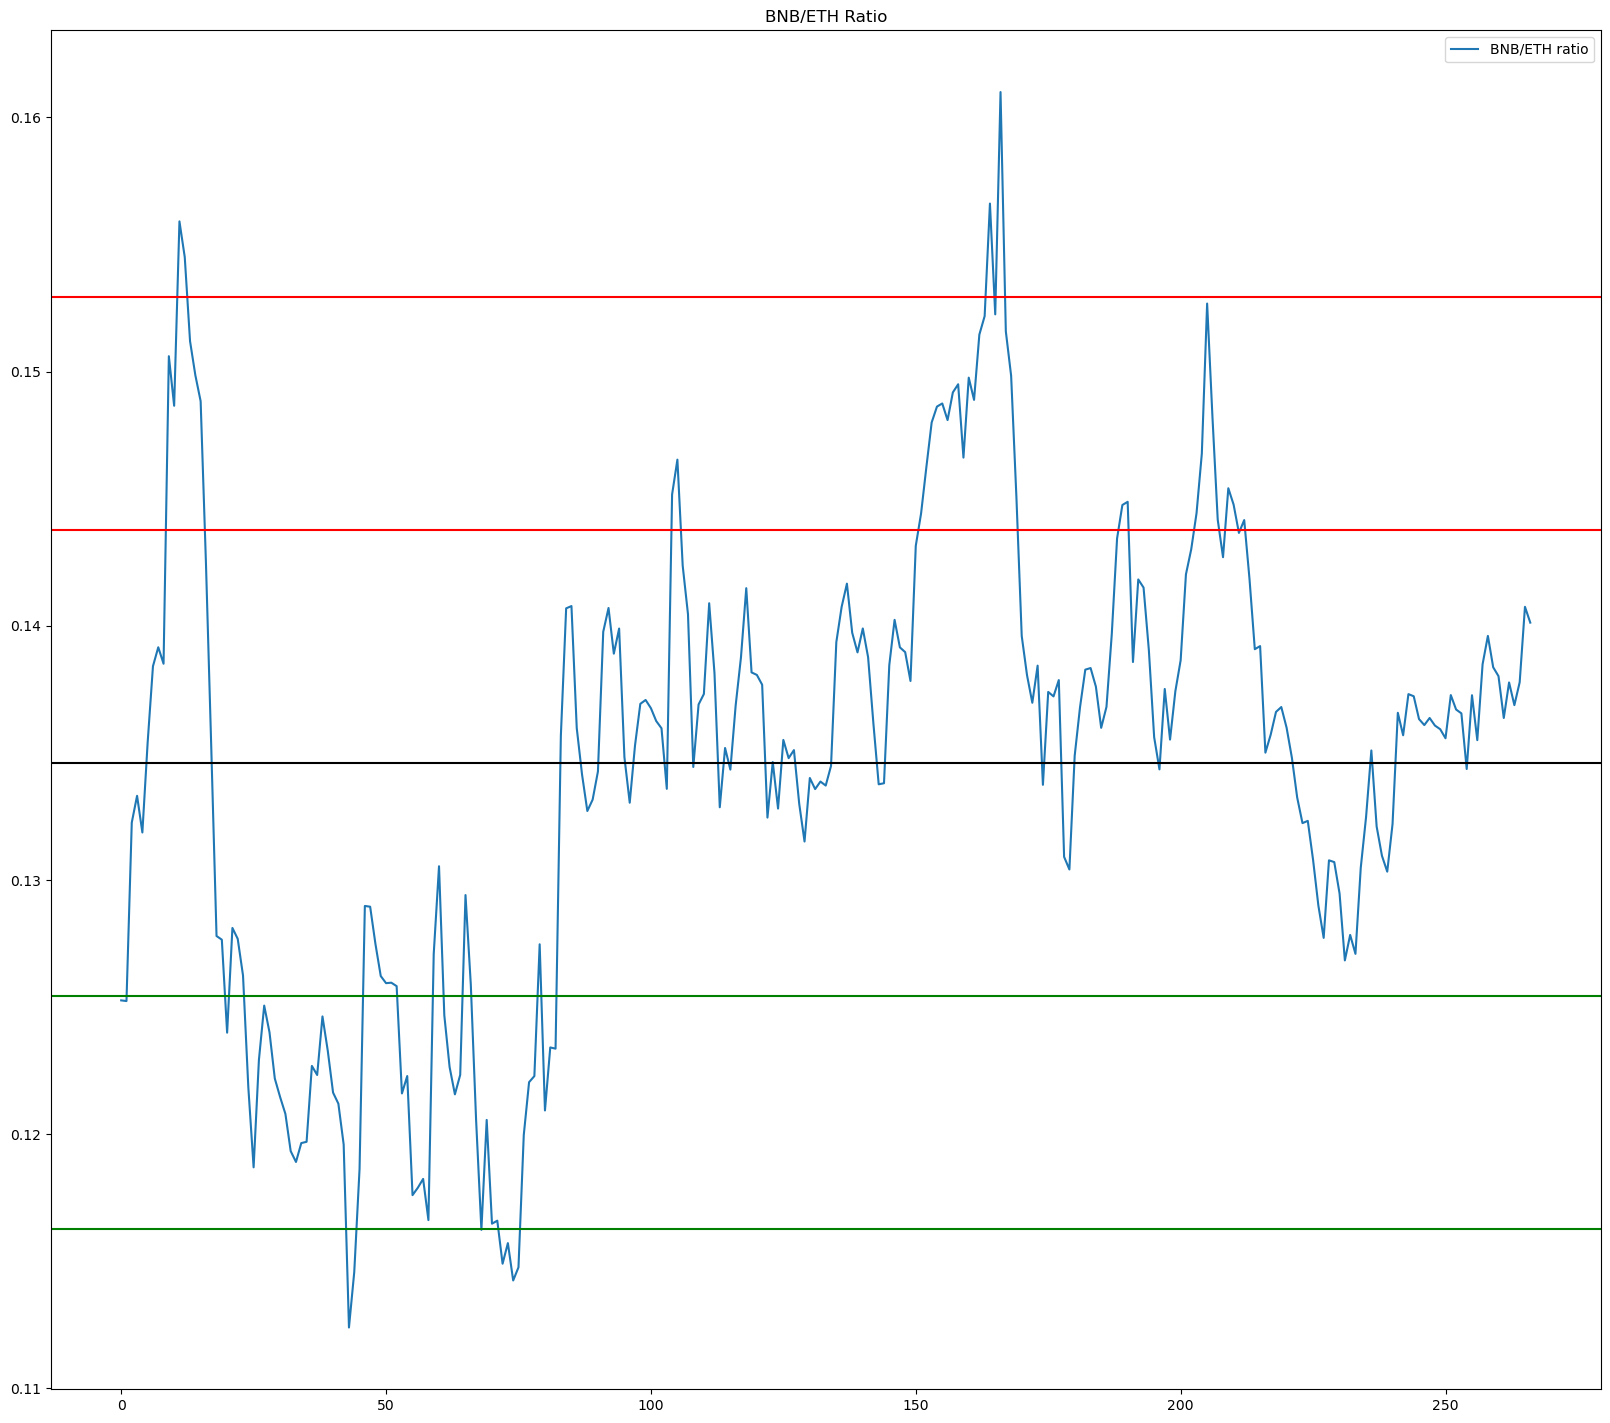

In [87]:
#Plots BNB/ETH price with limits as well as the mean price (in black)
figure(figsize=(20,18),dpi=100)
plt.plot(bnb_eth.Close, label='BNB/ETH ratio')
plt.title('BNB/ETH Ratio')
plt.axhline(lower_limit,color='green')
plt.axhline(min_lower,color='green')
plt.axhline(min_upper, color='red')
plt.axhline(upper_limit, color='red')
plt.axhline(bnb_eth.Close.mean(), color='black')
plt.legend()

In [88]:
#Retrives the price of ATOM
ATOM=d['ATOM-USD']

In [89]:
#Creates ATOM/ETH Pair price
atom_eth=ATOM/ETH

In [90]:
#Prints p-vlaue to determine correlation. P-vlaue falls under .05, we can accept the null hypothesis 
results=ts.coint(ATOM,ETH)
print('P Value for ATOM and ETH is', results[1])

P Value for ATOM and ETH is 0.018906206850889933


In [91]:
#Prints P-vlaue of Dickey Fuller test. Null Hypothesis is accepsted because p value falls under the .05 threshold
print('P Value for ATOM and Eth is',adfuller(atom_eth)[1])

P Value for ATOM and Eth is 0.0007049432235356614


In [92]:
#Creates the upper and lower limits of the ATOM/ETH pair using standard deviation
upper_l=atom_eth.mean()+2*atom_eth.std()
upper_m=atom_eth.mean()+atom_eth.std()
lower_l=atom_eth.mean()-2*atom_eth.std()
lower_m=atom_eth.mean()-atom_eth.std()

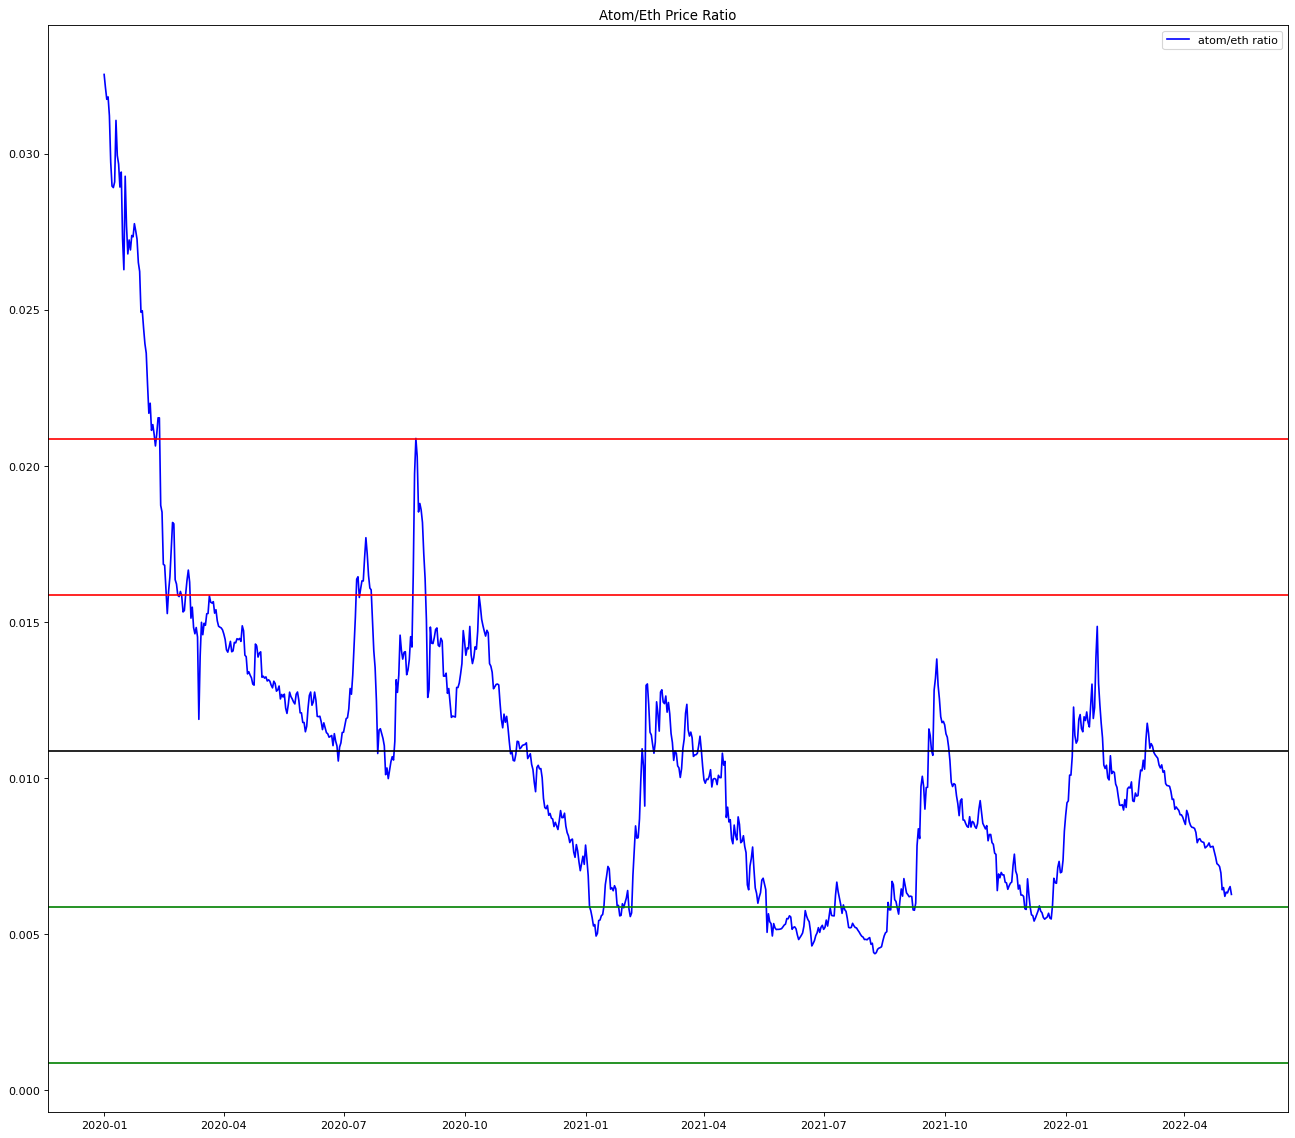

In [93]:
#Plots the ATOM/ETH pair with the upper and lower limits. Chart indicates it would be time to exchaning ETH for ATOM
figure(figsize=(20,18),dpi=80)
plt.plot(atom_eth, color='blue',label='atom/eth ratio')
plt.title('ATOM/ETH Ratio')
plt.axhline(upper_l,color='red')
plt.axhline(upper_m,color='red')
plt.axhline(lower_m,color='green')
plt.axhline(lower_l,color='green')
plt.axhline(atom_eth.mean(), color='black')
plt.title('Atom/Eth Price Ratio')
plt.legend()